# Unsupervised learning with k-means
### Dataset 2: [Wine.txt](input/Wine.txt)

### Description of the technique
k-means clustering method is an unsupervised machine learning technique used to identify clusters of data objects in a dataset.

### Objective
Use k-means to classify the patterns in k = 2, 3, …, K classes, and compare the obtained classes with the real ones.

## Index
<nav>

* [Import modules](#1)
* [Loading dataset](#2)
* [Standardize the data](#3)
* [Get the K value](#4)
* [K-means execution](#5)
* [Visualize 2D Projection](#6)
* [Visualize 3D Projection](#7)
* [References](#8)
</nav>

<a id="1"></a>
## Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

<a id="2"></a>
## Loading dataset

In [2]:
# Load training data
filename = 'input/Wine.txt'
df = pd.read_csv(filename, delimiter=',', header=0)
print(df)

features = ['Alcohol','Malic_Acid','Ash','Ash_Alcanity','Magnesium','Total_Phenols','Flavanoids','Nonflavanoid_Phenols','Proanthocyanins','Color_Intensity','Hue','OD280','Proline']
target = ['Customer_Segment']

# Separating out the features
X = df[features]

print(X.describe())

# Separating out the target (class)
y = df[target]


     Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06               

In [4]:
fig = px.scatter_matrix(df, dimensions=['Alcohol','Malic_Acid','Ash','Ash_Alcanity','Magnesium','Total_Phenols','Flavanoids','Nonflavanoid_Phenols','Proanthocyanins','Color_Intensity','Hue','OD280','Proline'], color='Customer_Segment')
fig.show()

<a id="3"></a>
## Standardize the data

In [5]:
# Standardizing the features
X_norm = StandardScaler().fit_transform(X)

print(X_norm)

[[ 1.51861254 -0.5622498   0.23205254 ...  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 ...  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.20923168  0.22769377  0.01273209 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.39508604  1.58316512  1.36520822 ... -1.52437837 -1.42894777
  -0.59516041]]


<a id="4"></a>
## Get the K value

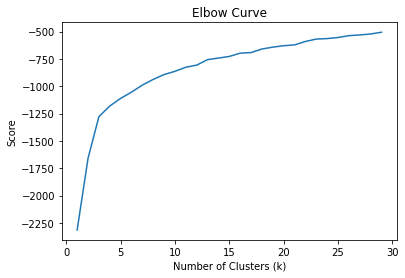

In [6]:
# Elbow curve to determine optimal value of k.
nc = range(1, 30)
kmeans = [KMeans(n_clusters=i) for i in nc]
kmeans
score = [kmeans[i].fit(X_norm).score(X_norm) for i in range(len(kmeans))]
score
plt.plot(nc,score)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

<a id="5"></a>
## K-means execution

In [7]:
n_classes =  np.unique(y).size

# Application of k-means with k = 6
kmeans = KMeans(n_clusters=n_classes, init="random", n_init=10, max_iter=300, algorithm = 'auto')
kmeans.fit(X_norm)

#centroids = kmeans.cluster_centers_
#print(centroids)

# Results of clustering are in labels_ inside the model
df['KMeans_clusters'] = kmeans.labels_
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment,KMeans_clusters
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,2


<a id="6"></a>
## Visualize 2D Projection

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


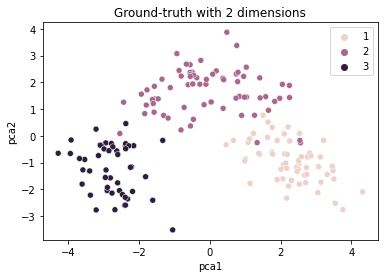

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 2 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


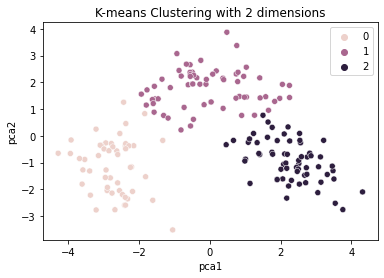

In [8]:
# Run PCA on the data and reduce the dimensions in pca_num_components dimensions
reduced_data = PCA(n_components=2).fit_transform(X_norm)
results = pd.DataFrame(data=reduced_data, columns=['pca1','pca2'])

print(y.values.flatten())

sb.scatterplot(x="pca1", y="pca2", hue=y.values.flatten(), data=results)
plt.title('Ground-truth with 2 dimensions')
plt.show()

print(kmeans.labels_)

sb.scatterplot(x="pca1", y="pca2", hue=kmeans.labels_, data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

<a id="7"></a>
## Visualize 3D Projection

         pca1      pca2      pca3
0    3.316751 -1.443463 -0.165739
1    2.209465  0.333393 -2.026457
2    2.516740 -1.031151  0.982819
3    3.757066 -2.756372 -0.176192
4    1.008908 -0.869831  2.026688
..        ...       ...       ...
173 -3.370524 -2.216289 -0.342570
174 -2.601956 -1.757229  0.207581
175 -2.677839 -2.760899 -0.940942
176 -2.387017 -2.297347 -0.550696
177 -3.208758 -2.768920  1.013914

[178 rows x 3 columns]


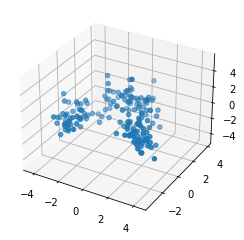

In [9]:
# Run PCA on the data and reduce the dimensions in pca_num_components dimensions
reduced_data = PCA(n_components=3).fit_transform(X_norm)
results = pd.DataFrame(data=reduced_data, columns=['pca1','pca2','pca3'])
print(results)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(results['pca1'], results['pca2'], results['pca3'])
plt.show()

<a id="6"></a>
## References

k-means:

- [K-Means Clustering in Python with scikit-learn](https://www.datacamp.com/community/tutorials/k-means-clustering-python)
- [A demo of K-Means clustering on the handwritten digits data](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py)
- [K Means Clustering Simplified in Python
](https://www.analyticsvidhya.com/blog/2021/04/k-means-clustering-simplified-in-python)
- [Clustering (Agrupamiento), K-Means con ejemplos en python](https://www.iartificial.net/clustering-agrupamiento-kmeans-ejemplos-en-python/#Ejemplo_de_Clustering_K-Means_en_Python)

Scatterplot Matrix:

- [Scatterplot Matrix in Python](https://plotly.com/python/splom/)